<a href="https://colab.research.google.com/github/macrotentional/DS-Unit-1-Build/blob/master/Martin's_sleep_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib as plt
import json as js
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Possible research topics:


*   **sleep quality vs minutes of exercise**
*   sleep quality vs phyiscal activity (heart rate)
*   minutes of deep/REM sleep vs minutes of physical activity
*   sleep quality vs time on computer 
*   sleep quality vs nightly/daily screen/phone usage (use data from phone?)
*   sleep quality vs hours of sunlight (use data from weather site?



In [3]:
'''checking out how the variables that contribute to the nightly sleep score'''

sleep_data = pd.read_csv('https://raw.githubusercontent.com/macrotentional/DS-Unit-1-Build/master/sleep_score%20v2.csv')
sleep_data

,Date,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,2020-04-28T08:30:30Z,79,17,22,40,56,53,0.110568
1,2020-04-27T08:49:00Z,79,16,21,42,81,55,0.108818
2,2020-04-26T09:05:00Z,52,15,10,27,28,53,0.128370
3,2020-04-25T09:14:00Z,61,16,17,28,66,51,0.099682
4,2020-04-24T08:29:00Z,74,17,21,36,79,50,0.088267
...,...,...,...,...,...,...,...,...
115,2019-12-11T08:22:00Z,82,17,23,42,79,47,0.057085
116,2019-12-09T09:03:00Z,81,18,18,45,28,47,0.083112
117,2019-12-08T08:41:30Z,71,14,16,41,6,47,0.172060
118,2019-12-07T09:30:30Z,64,16,14,34,38,46,0.097943


In [4]:
sleep_data.dtypes

Date                      object
overall_score              int64
composition_score          int64
revitalization_score       int64
duration_score             int64
deep_sleep_in_minutes      int64
resting_heart_rate         int64
restlessness             float64
dtype: object

In [5]:
sleep_data.describe()

,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,76.500000,17.333333,20.608333,38.558333,50.591667,49.033333,0.082771
std,6.047432,1.928701,2.294663,4.212418,23.155120,1.878375,0.018341
min,52.000000,13.000000,10.000000,25.000000,0.000000,46.000000,0.052506
25%,73.000000,16.000000,20.000000,36.000000,33.750000,48.000000,0.071511
50%,78.000000,17.000000,21.000000,39.000000,49.500000,49.000000,0.080788
75%,80.000000,19.000000,22.000000,41.000000,66.250000,50.000000,0.092126
max,89.000000,21.000000,24.000000,46.000000,103.000000,55.000000,0.172060


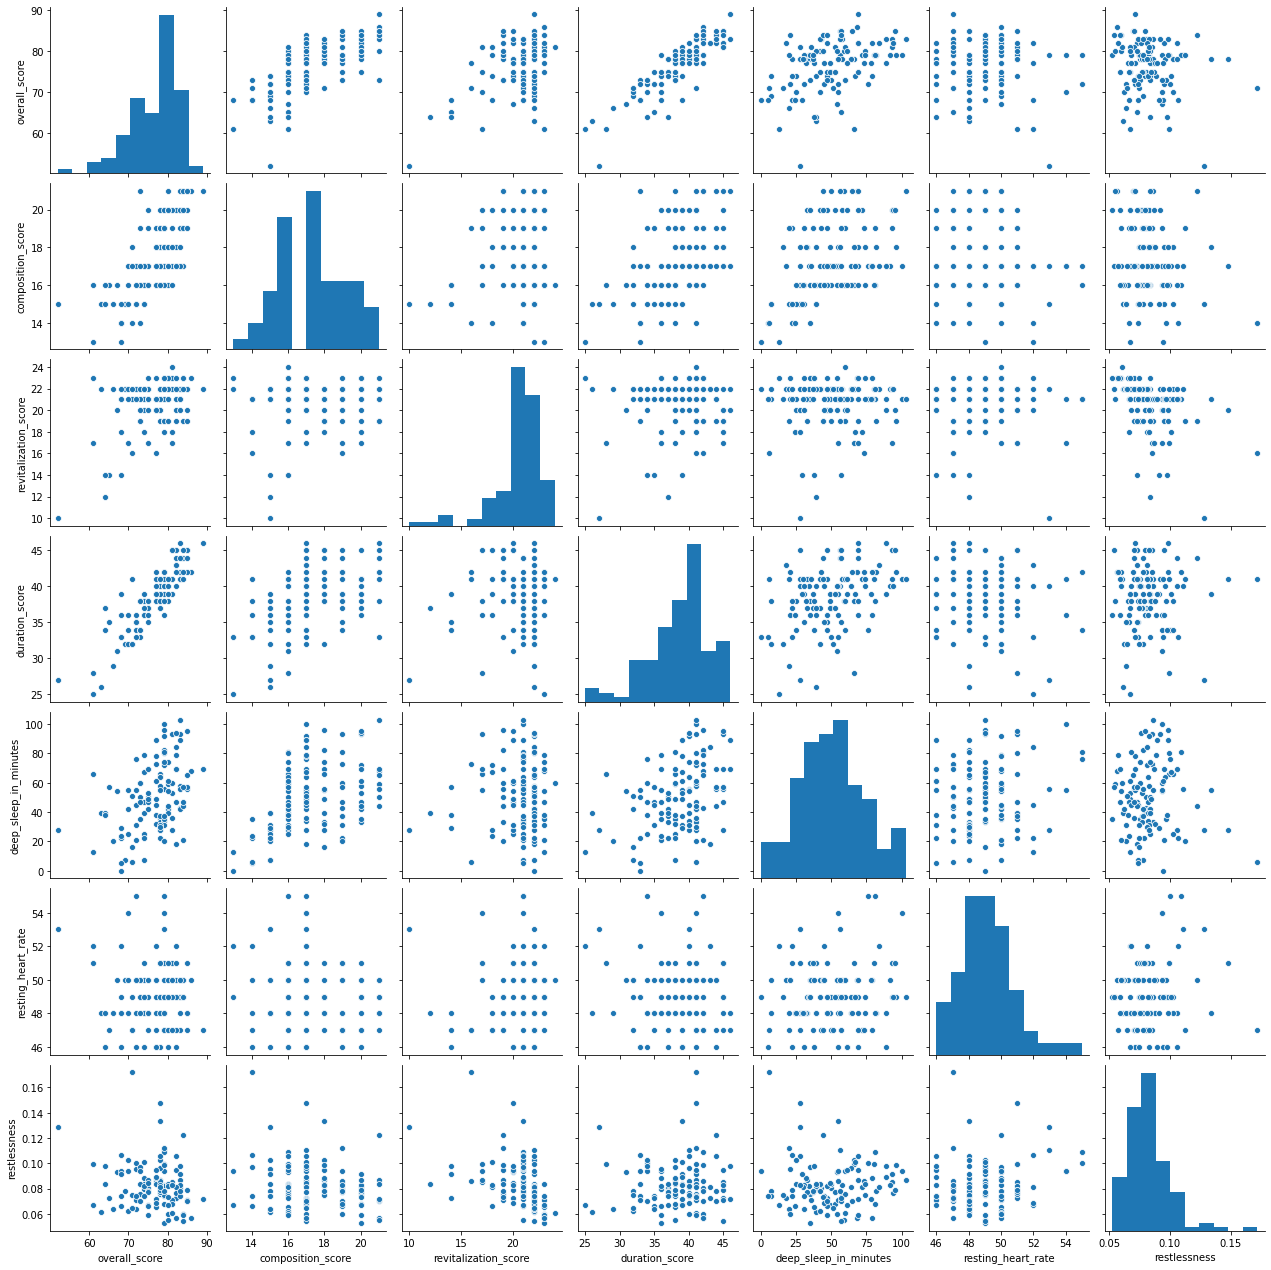

In [6]:
'''pairplot of sleep score variables'''

sns.pairplot(sleep_data)

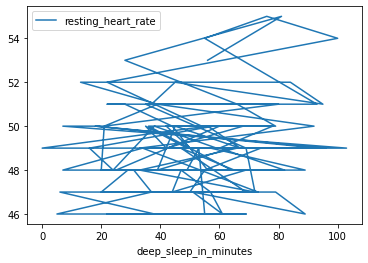

In [7]:
'''testing out a scatter plot on two of the sleep score variables'''

sleep_data.plot('deep_sleep_in_minutes', 'resting_heart_rate')

In [0]:
#sleep_data['Date'] = sleep_data['Date'](:-10)
#sleep_data

In [9]:
#sleep_data['Date'][0]:10]

sleep_data['Date'] = [i[:10] for i in sleep_data['Date']]
sleep_data

,Date,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,2020-04-28,79,17,22,40,56,53,0.110568
1,2020-04-27,79,16,21,42,81,55,0.108818
2,2020-04-26,52,15,10,27,28,53,0.128370
3,2020-04-25,61,16,17,28,66,51,0.099682
4,2020-04-24,74,17,21,36,79,50,0.088267
...,...,...,...,...,...,...,...,...
115,2019-12-11,82,17,23,42,79,47,0.057085
116,2019-12-09,81,18,18,45,28,47,0.083112
117,2019-12-08,71,14,16,41,6,47,0.172060
118,2019-12-07,64,16,14,34,38,46,0.097943


In [10]:
'''sorting the sleep score data by date'''

sleep_data_sorted = sleep_data.sort_values('Date')
sleep_data_sorted 

,Date,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
119,2019-12-06,74,15,22,37,22,46,0.074434
118,2019-12-07,64,16,14,34,38,46,0.097943
117,2019-12-08,71,14,16,41,6,47,0.172060
116,2019-12-09,81,18,18,45,28,47,0.083112
115,2019-12-11,82,17,23,42,79,47,0.057085
...,...,...,...,...,...,...,...,...
4,2020-04-24,74,17,21,36,79,50,0.088267
3,2020-04-25,61,16,17,28,66,51,0.099682
2,2020-04-26,52,15,10,27,28,53,0.128370
1,2020-04-27,79,16,21,42,81,55,0.108818


In [11]:
merged_sleep_data = pd.read_csv('https://raw.githubusercontent.com/macrotentional/DS-Unit-1-Build/master/merged%20sleep%20data_dec%202019-april%202020%20v2.csv')
merged_sleep_data

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2019-12-31 12:13AM,2019-12-31 8:50AM,441,76,23,517,65.0,347.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-30 12:39AM,2019-12-30 9:39AM,505,35,4,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-28 10:01PM,2019-12-29 10:03AM,603,119,27,722,180.0,403.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-28 12:02AM,2019-12-28 9:22AM,532,28,4,560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-26 11:24PM,2019-12-27 10:09AM,568,77,29,645,117.0,394.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2020-04-05 4:23AM,2020-04-05 11:11AM,361,47,28,408,52.0,288.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,2020-04-04 12:43AM,2020-04-04 9:15AM,445,67,42,512,44.0,321.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,2020-04-03 12:00AM,2020-04-03 7:33AM,386,67,26,453,47.0,300.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,2020-04-02 1:36AM,2020-04-02 10:14AM,445,73,36,518,65.0,288.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
'''deleting empty columns'''

#merged_sleep_data.drop('Unnamed: 9 ', 'Unnamed: 10 ', 'Unnamed: 11 ', 'Unnamed: 12 ', 'Unnamed: 13 ', 'Unnamed: 14 ', 'Unnamed: 15 ', 'Unnamed: 16 ', axis=1)
#merged_sleep_data.head()

merged_sleep_data.drop(merged_sleep_data[['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']], axis=1, inplace=True)
merged_sleep_data.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
0,2019-12-31 12:13AM,2019-12-31 8:50AM,441,76,23,517,65.0,347.0,29.0
1,2019-12-30 12:39AM,2019-12-30 9:39AM,505,35,4,540,NaN,NaN,NaN
2,2019-12-28 10:01PM,2019-12-29 10:03AM,603,119,27,722,180.0,403.0,20.0
3,2019-12-28 12:02AM,2019-12-28 9:22AM,532,28,4,560,NaN,NaN,NaN
4,2019-12-26 11:24PM,2019-12-27 10:09AM,568,77,29,645,117.0,394.0,57.0


In [13]:
merged_sleep_data.shape

(146, 9)

In [14]:
'''attempting to transform index into Date so I can merge it with the exercise df'''

merged_sleep_data.drop([0, 1], axis=0, inplace=True)
merged_sleep_data.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
2,2019-12-28 10:01PM,2019-12-29 10:03AM,603,119,27,722,180.0,403.0,20.0
3,2019-12-28 12:02AM,2019-12-28 9:22AM,532,28,4,560,NaN,NaN,NaN
4,2019-12-26 11:24PM,2019-12-27 10:09AM,568,77,29,645,117.0,394.0,57.0
5,2019-12-25 11:18PM,2019-12-26 9:06AM,530,58,35,588,135.0,326.0,69.0
6,2019-12-24 11:59PM,2019-12-25 8:52AM,514,19,0,533,NaN,NaN,NaN


In [15]:
merged_sleep_data.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
2,2019-12-28 10:01PM,2019-12-29 10:03AM,603,119,27,722,180.0,403.0,20.0
3,2019-12-28 12:02AM,2019-12-28 9:22AM,532,28,4,560,NaN,NaN,NaN
4,2019-12-26 11:24PM,2019-12-27 10:09AM,568,77,29,645,117.0,394.0,57.0
5,2019-12-25 11:18PM,2019-12-26 9:06AM,530,58,35,588,135.0,326.0,69.0
6,2019-12-24 11:59PM,2019-12-25 8:52AM,514,19,0,533,NaN,NaN,NaN


In [16]:
merged_sleep_data.shape

(144, 9)

In [17]:
merged_sleep_data.reset_index

<bound method DataFrame.reset_index of              Start Time  ... Minutes Deep Sleep
2    2019-12-28 10:01PM  ...               20.0
3    2019-12-28 12:02AM  ...                NaN
4    2019-12-26 11:24PM  ...               57.0
5    2019-12-25 11:18PM  ...               69.0
6    2019-12-24 11:59PM  ...                NaN
..                  ...  ...                ...
141   2020-04-05 4:23AM  ...               21.0
142  2020-04-04 12:43AM  ...               80.0
143  2020-04-03 12:00AM  ...               39.0
144   2020-04-02 1:36AM  ...               92.0
145   2020-04-01 1:13AM  ...               33.0

[144 rows x 9 columns]>

In [18]:
merged_sleep_data.head()

,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep
2,2019-12-28 10:01PM,2019-12-29 10:03AM,603,119,27,722,180.0,403.0,20.0
3,2019-12-28 12:02AM,2019-12-28 9:22AM,532,28,4,560,NaN,NaN,NaN
4,2019-12-26 11:24PM,2019-12-27 10:09AM,568,77,29,645,117.0,394.0,57.0
5,2019-12-25 11:18PM,2019-12-26 9:06AM,530,58,35,588,135.0,326.0,69.0
6,2019-12-24 11:59PM,2019-12-25 8:52AM,514,19,0,533,NaN,NaN,NaN


In [19]:
merged_exercise_data = pd.read_csv('https://raw.githubusercontent.com/macrotentional/DS-Unit-1-Build/master/merged%20exercise%20data_dec%202019-april%202020%20v2.csv')
merged_exercise_data

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2019-12-01,"1,530",0,0.00,0,"1,440",0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-02,"1,697",399,0.17,2,"1,440",0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-03,"1,966","3,745",1.59,12,"1,432",8,0,0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-04,"2,227","7,675",5.02,12,778,142,5,34,819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-05,"2,135","7,100",4.83,6,865,92,1,38,667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2020-04-24,"2,149","6,836",4.48,7,794,134,2,32,712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,2020-04-25,"5,200","50,154",31.03,68,419,146,27,377,"4,188",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,2020-04-26,"2,394","6,226",2.77,15,797,219,3,26,942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,2020-04-27,"2,178","7,146",3.18,21,686,152,9,34,783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
merged_exercise_data.drop(merged_exercise_data[['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18']], axis=1, inplace=True)
# merged_exercise_data.head()

In [21]:
merged_exercise_data.shape

(149, 10)

In [0]:
merged_sleep_data = pd.read_csv('https://raw.githubusercontent.com/macrotentional/DS-Unit-1-Build/master/merged%20sleep%20data_dec%202019-april%202020%20v3.csv')
# merged_sleep_data

In [0]:
#merged_sleep_data.sort_index(['Date'], axis=1, ascending=True)

In [0]:
merged_exercise_data.drop([0, 1], axis=0, inplace=True)
# merged_exercise_data.head()

In [25]:
merged_exercise_data.shape

(147, 10)

In [0]:
'''merged sleep and exercise data'''

sleepcise_data =  pd.merge(merged_sleep_data, merged_exercise_data, how='inner', on='Date')
# sleepcise_data

In [0]:
sleepcise_data_sorted = sleepcise_data.set_index('Date')
# sleepcise_data_sorted

In [0]:
sleepcise_data_sorted = sleepcise_data_sorted.sort_values('Date')
# sleepcise_data_sorted

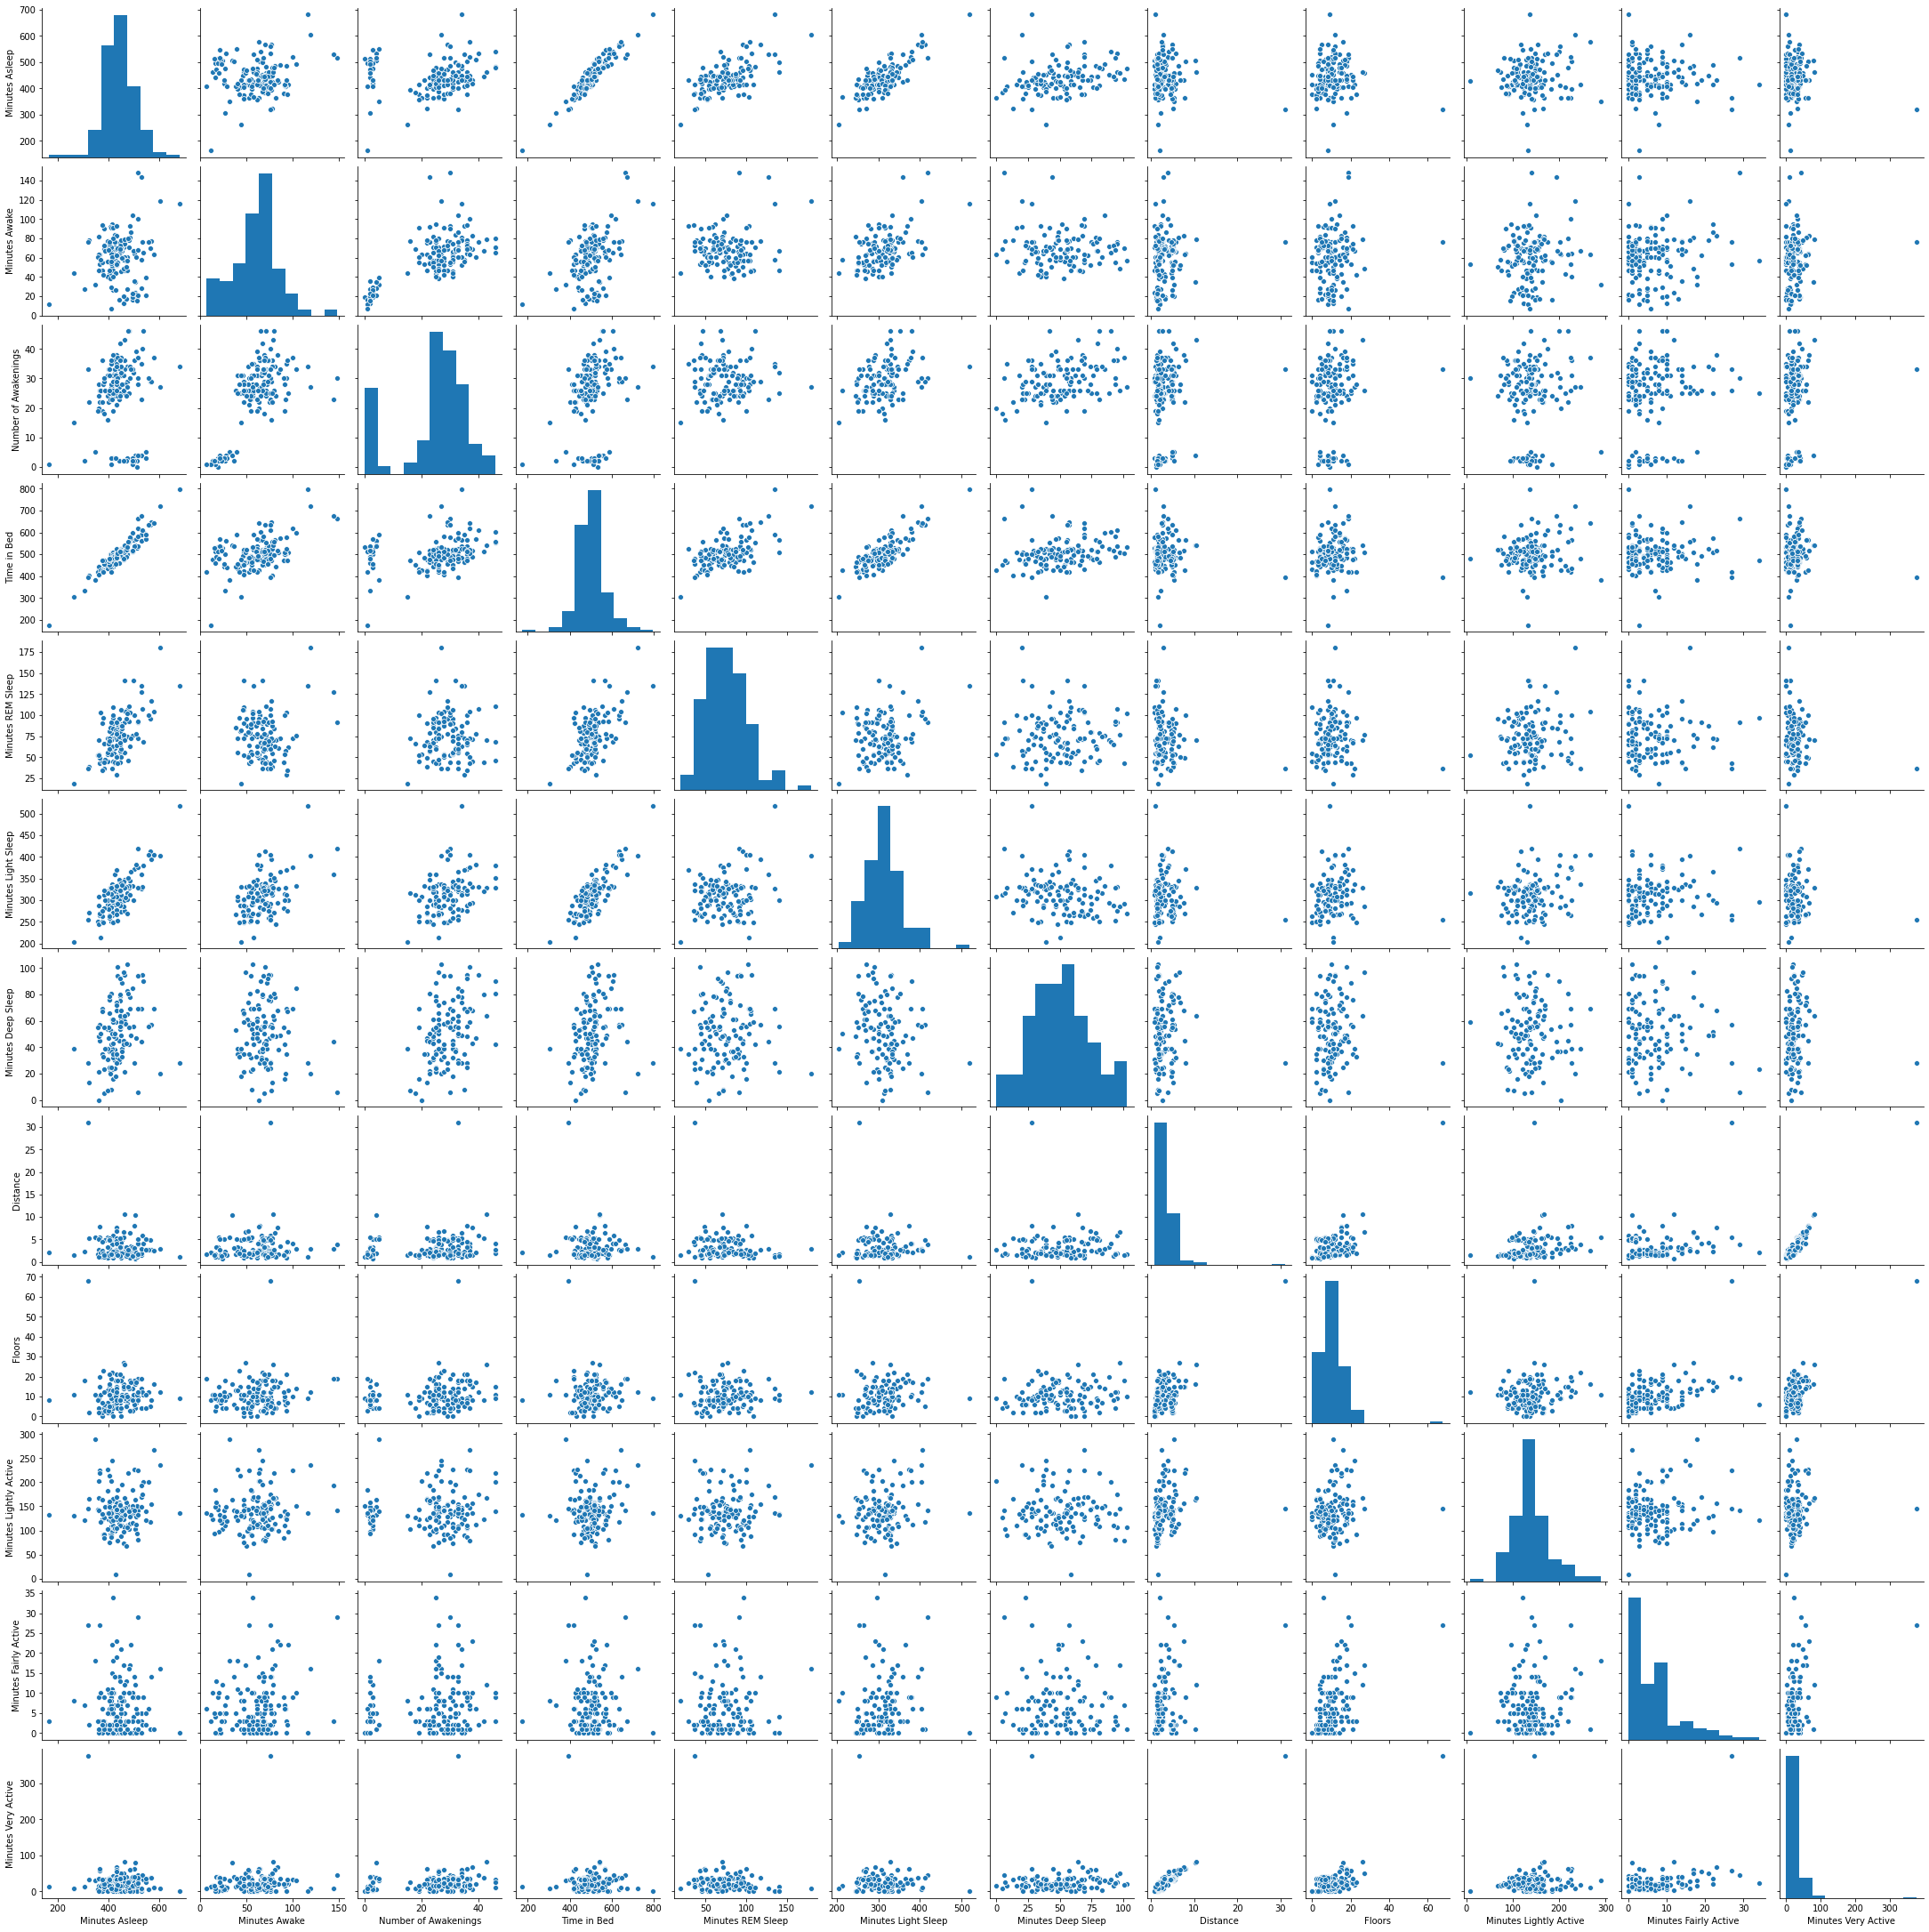

In [29]:
'''exploring correlations betweeen sleep and exercise data'''

sns.pairplot(sleepcise_data_sorted)

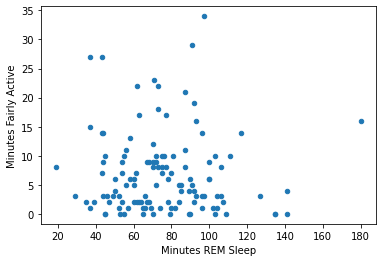

In [30]:
'''sample scatter plot of sleep variable vs exercise variable'''

sleepcise_data_sorted.plot.scatter('Minutes REM Sleep', 'Minutes Fairly Active')

In [31]:
'''merging sleep score data and sleep+exercise data'''

sleepcise_data =  pd.merge(sleepcise_data_sorted, sleep_data_sorted, how='inner', on='Date')
sleepcise_data

,Date,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,2019-12-06,2019-12-07 1:00AM,2019-12-07 9:30AM,426,84,32,510,61.0,327.0,38.0,"1,936","3,724",1.66,7,851,100,7,19,474,74,15,22,37,22,46,0.074434
1,2019-12-07,2019-12-07 9:37PM,2019-12-08 8:41AM,516,148,30,664,91.0,419.0,6.0,"2,312","8,838",3.94,19,716,141,29,44,938,64,16,14,34,38,46,0.097943
2,2019-12-08,2019-12-08 11:37PM,2019-12-09 9:03AM,501,64,36,565,100.0,373.0,28.0,"2,696","14,345",7.98,18,477,227,9,63,"1,372",71,14,16,41,6,47,0.172060
3,2019-12-09,2019-12-09 11:58PM,2019-12-10 8:47AM,505,24,3,529,NaN,NaN,NaN,"1,854","1,801",0.80,4,757,102,12,2,384,81,18,18,45,28,47,0.083112
4,2019-12-11,2019-12-11 11:36PM,2019-12-12 8:21AM,453,72,25,525,70.0,294.0,89.0,"2,158","6,722",3.35,20,757,136,9,25,722,82,17,23,42,79,47,0.057085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2020-04-23,2020-04-24 12:31AM,2020-04-24 8:29AM,402,76,33,478,60.0,263.0,79.0,"2,263","7,297",4.82,5,786,149,2,32,833,67,16,20,31,54,50,0.093275
113,2020-04-24,2020-04-25 1:22AM,2020-04-25 9:14AM,377,94,36,471,35.0,275.0,67.0,"2,149","6,836",4.48,7,794,134,2,32,712,74,17,21,36,79,50,0.088267
114,2020-04-25,2020-04-26 2:30AM,2020-04-26 9:05AM,319,76,33,395,37.0,254.0,28.0,"5,200","50,154",31.03,68,419,146,27,377,"4,188",61,16,17,28,66,51,0.099682
115,2020-04-26,2020-04-26 11:30PM,2020-04-27 8:49AM,479,80,46,559,46.0,352.0,81.0,"2,394","6,226",2.77,15,797,219,3,26,942,52,15,10,27,28,53,0.128370


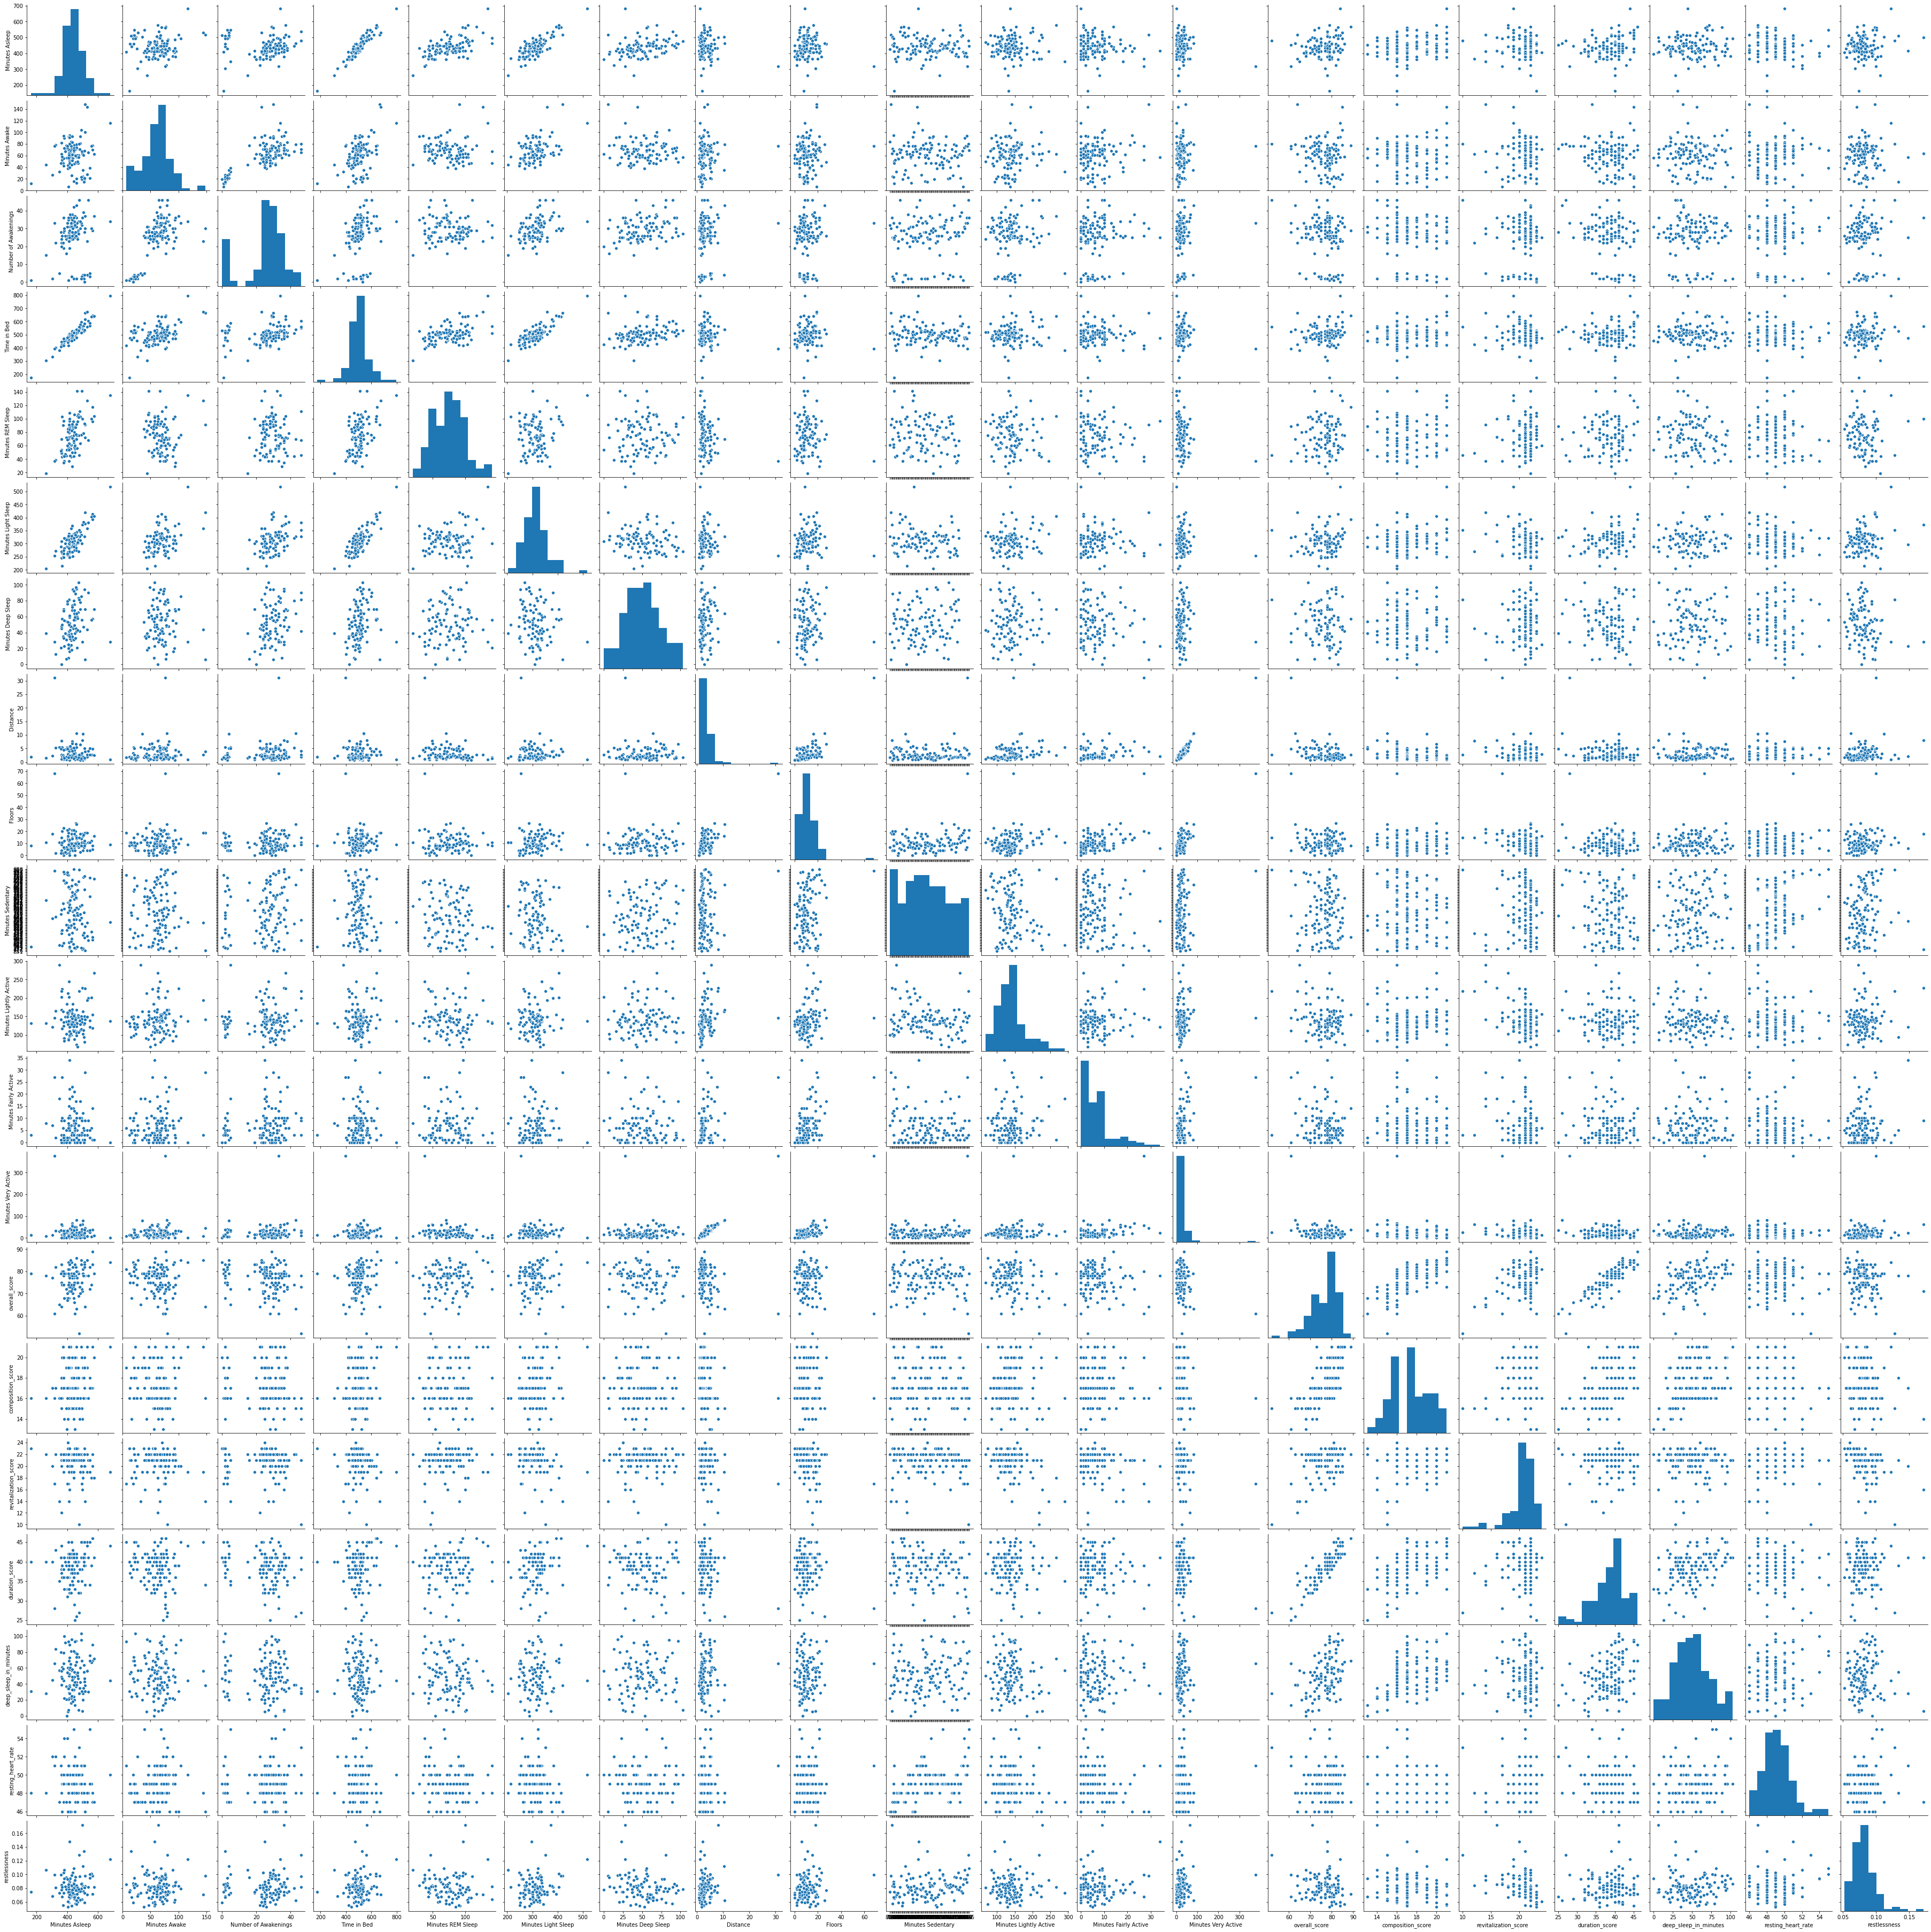

In [32]:
'''exploring correlations betweeen sleep score data and sleep+exercise data'''


sns.pairplot(sleepcise_data)

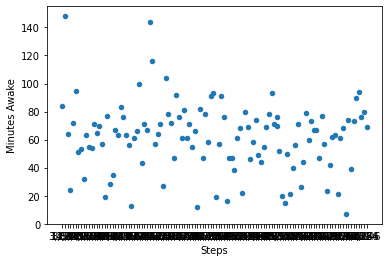

In [33]:
sleepcise_data.plot.scatter('Steps', 'Minutes Awake')

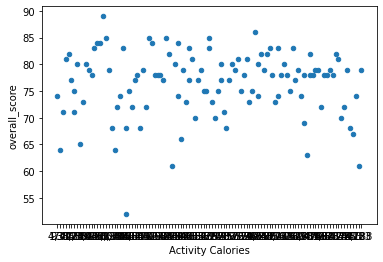

In [34]:
'''scatter plot of the two variable I decided to focus on''

sleepcise_data.plot.scatter('Activity Calories', 'overall_score')

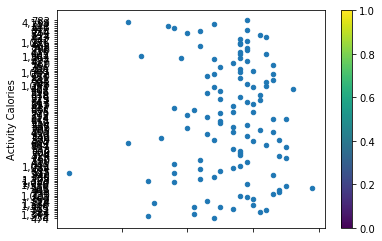

In [35]:
'''switching x and y axis to determine how the plot looks different'''

sleepcise_data.plot.scatter('overall_score', 'Activity Calories', colormap='viridis');

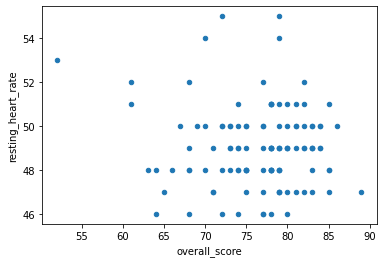

In [36]:
'''plotting another potential exercise variable vs sleep score'''

sleepcise_data.plot.scatter('overall_score', 'resting_heart_rate');

In [37]:
sleepcise_data['Activity Calories'].unique()
# found commas need to change to int cant 
# sleepcise_data['Activity Calories'].astype('int32').dtypes

array(['474', '938', '1,372', '384', '722', '561', '715', '1,346',
       '1,388', '514', '399', '803', '1,022', '733', '738', '462', '906',
       '559', '1,310', '1,040', '1,333', '1,308', '785', '840', '942',
       '535', '463', '784', '1,033', '846', '431', '530', '760', '419',
       '724', '708', '630', '578', '727', '864', '699', '434', '539',
       '584', '540', '956', '450', '705', '633', '586', '537', '526',
       '552', '478', '614', '392', '779', '575', '655', '587', '417',
       '697', '513', '617', '729', '529', '676', '519', '396', '402',
       '484', '1,057', '748', '596', '581', '881', '556', '773', '1,069',
       '731', '405', '326', '761', '560', '427', '394', '493', '1,384',
       '601', '475', '816', '768', '508', '461', '1,031', '926', '542',
       '437', '524', '845', '754', '375', '447', '833', '712', '4,188',
       '783'], dtype=object)

In [0]:
# sleepcise_data['Activity Calories'] = sleepcise_data['Activity Calories'].str.lstrip(',')
# sleepcise_data['Activity Calories'].replace(',','', regex=True, inplace=True)

In [0]:
# sleepcise_data['Activity Calories'].unique()


In [0]:
# sleepcise_data['Activity Calories'] = sleepcise_data['Activity Calories'].astype('int32')

In [0]:
'''converting dates to datetime format'''

# function to turn objects to approx value (remove commas)
def format(df):
    copy = df.copy()
    copy['Date'] = pd.to_datetime(sleepcise_data['Date'])
    copy['Start Time'] = pd.to_datetime(sleepcise_data['Start Time'])
    copy['End Time'] = pd.to_datetime(sleepcise_data['End Time'])

    copy.replace(',','', regex=True, inplace=True)
    c = copy.select_dtypes(object).columns
    copy[c] = copy[c].apply(pd.to_numeric,errors='coerce')
    return copy

In [0]:
sleepcise_data = format(sleepcise_data)

In [42]:
sleepcise_data['Activity Calories'].unique()

array([ 474,  938, 1372,  384,  722,  561,  715, 1346, 1388,  514,  399,
        803, 1022,  733,  738,  462,  906,  559, 1310, 1040, 1333, 1308,
        785,  840,  942,  535,  463,  784, 1033,  846,  431,  530,  760,
        419,  724,  708,  630,  578,  727,  864,  699,  434,  539,  584,
        540,  956,  450,  705,  633,  586,  537,  526,  552,  478,  614,
        392,  779,  575,  655,  587,  417,  697,  513,  617,  729,  529,
        676,  519,  396,  402,  484, 1057,  748,  596,  581,  881,  556,
        773, 1069,  731,  405,  326,  761,  560,  427,  394,  493, 1384,
        601,  475,  816,  768,  508,  461, 1031,  926,  542,  437,  524,
        845,  754,  375,  447,  833,  712, 4188,  783])

In [43]:
sleepcise_data.head()

,Date,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,2019-12-06,2019-12-07 01:00:00,2019-12-07 09:30:00,426,84,32,510,61.0,327.0,38.0,1936,3724,1.66,7,851,100,7,19,474,74,15,22,37,22,46,0.074434
1,2019-12-07,2019-12-07 21:37:00,2019-12-08 08:41:00,516,148,30,664,91.0,419.0,6.0,2312,8838,3.94,19,716,141,29,44,938,64,16,14,34,38,46,0.097943
2,2019-12-08,2019-12-08 23:37:00,2019-12-09 09:03:00,501,64,36,565,100.0,373.0,28.0,2696,14345,7.98,18,477,227,9,63,1372,71,14,16,41,6,47,0.172060
3,2019-12-09,2019-12-09 23:58:00,2019-12-10 08:47:00,505,24,3,529,NaN,NaN,NaN,1854,1801,0.80,4,757,102,12,2,384,81,18,18,45,28,47,0.083112
4,2019-12-11,2019-12-11 23:36:00,2019-12-12 08:21:00,453,72,25,525,70.0,294.0,89.0,2158,6722,3.35,20,757,136,9,25,722,82,17,23,42,79,47,0.057085


In [44]:
sleepcise_data.dtypes

Date                      datetime64[ns]
Start Time                datetime64[ns]
End Time                  datetime64[ns]
Minutes Asleep                     int64
Minutes Awake                      int64
Number of Awakenings               int64
Time in Bed                        int64
Minutes REM Sleep                float64
Minutes Light Sleep              float64
Minutes Deep Sleep               float64
Calories Burned                    int64
Steps                              int64
Distance                         float64
Floors                             int64
Minutes Sedentary                  int64
Minutes Lightly Active             int64
Minutes Fairly Active              int64
Minutes Very Active                int64
Activity Calories                  int64
overall_score                      int64
composition_score                  int64
revitalization_score               int64
duration_score                     int64
deep_sleep_in_minutes              int64
resting_heart_ra

In [45]:
sleepcise_data.describe()

,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
count,117.000000,117.000000,117.000000,117.000000,98.000000,98.000000,98.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,441.435897,61.435897,25.213675,502.905983,75.122449,312.326531,50.795918,2131.076923,6204.384615,3.254786,10.880342,756.777778,141.427350,6.965812,26.170940,711.487179,76.410256,17.333333,20.606838,38.470085,50.119658,49.034188,0.082372
std,66.261028,24.654294,11.467216,73.635283,25.018865,46.497484,23.230783,354.423139,5044.312941,3.239511,7.847866,88.708172,39.142163,6.731208,36.906053,405.926455,6.094307,1.952010,2.315455,4.221400,23.197489,1.842654,0.018259
min,163.000000,7.000000,0.000000,175.000000,19.000000,204.000000,0.000000,1807.000000,1801.000000,0.800000,0.000000,419.000000,68.000000,0.000000,0.000000,326.000000,52.000000,13.000000,10.000000,25.000000,0.000000,46.000000,0.052506
25%,409.000000,47.000000,23.000000,471.000000,55.250000,283.500000,33.500000,1955.000000,3845.000000,1.710000,7.000000,714.000000,117.000000,2.000000,12.000000,508.000000,73.000000,16.000000,20.000000,36.000000,33.000000,48.000000,0.070999
50%,441.000000,63.000000,28.000000,507.000000,74.500000,312.500000,49.500000,2037.000000,5118.000000,2.280000,9.000000,775.000000,137.000000,5.000000,19.000000,614.000000,78.000000,17.000000,21.000000,39.000000,49.000000,49.000000,0.080612
75%,475.000000,76.000000,33.000000,530.000000,92.000000,332.250000,67.750000,2206.000000,7355.000000,4.210000,15.000000,806.000000,154.000000,10.000000,34.000000,784.000000,80.000000,19.000000,22.000000,41.000000,66.000000,50.000000,0.091351
max,681.000000,148.000000,46.000000,797.000000,141.000000,518.000000,103.000000,5200.000000,50154.000000,31.030000,68.000000,900.000000,290.000000,34.000000,377.000000,4188.000000,89.000000,21.000000,24.000000,46.000000,103.000000,55.000000,0.172060


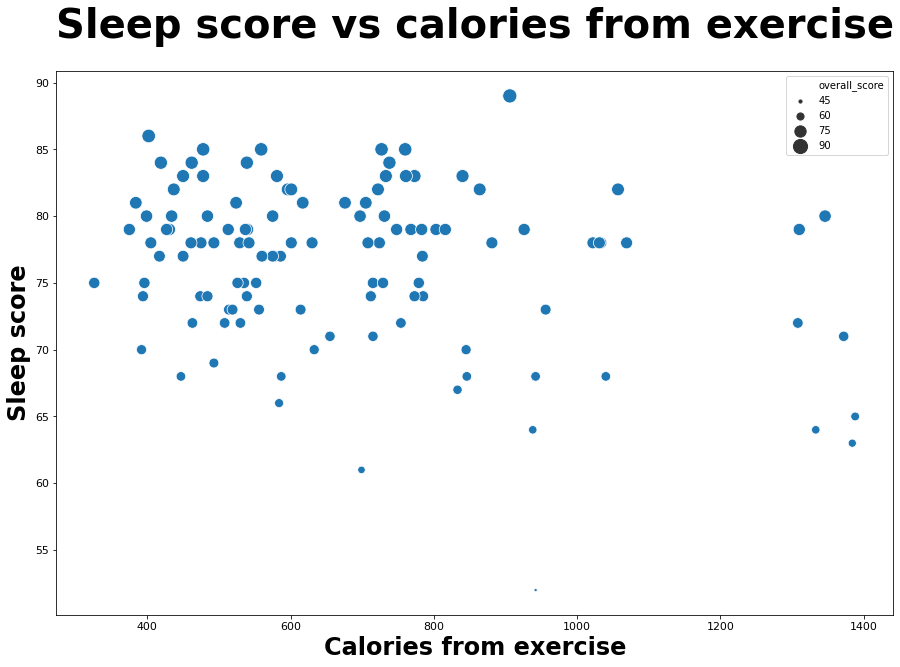

In [46]:
# change xticks to more manageable increments 
# look for linear regression model

#fig, ax =plt.subplots()

import matplotlib.pyplot as plt

# plt.style.use('seaborn-dark')

# sleepcise_data.plot.scatter('Activity Calories', 'overall_score');

#sleepcise_data.ax.scatter('Activity Calories');

# ax.set_xlabel('Calories from exercise', fontsize=10, fontweight='bold')
# ax.set_ylabel('Sleep score', fontsize=10, fontweight='bold')

#ax.set_xticks(range(1,2000,1))

#ax.set_yticks(range(0, 1, 99))
f, axes = plt.subplots( sharey=True, figsize=(15, 10))
comp_1 = sleepcise_data[sleepcise_data['Activity Calories']<2000]
title = axes.set_title('Sleep score vs calories from exercise', fontsize=40, fontweight='bold')
title.set_position([.5, 1.05])

sns.scatterplot(x='Activity Calories', y='overall_score', size='overall_score',  sizes=(10, 200),data=comp_1)

#plt.style.use('seaborn-dark')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
xlabel = plt.xlabel("Calories from exercise", fontsize=24, fontweight='bold')
xlabel.set_position([.5, .25])
ylabel = plt.ylabel("Sleep score", fontsize=24, fontweight='bold')
plt.show()

In [47]:
sleepcise_data['Activity Calories'].max()

4188

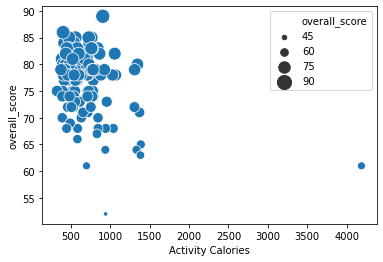

In [49]:
sns.scatterplot(x='Activity Calories', y='overall_score', size='overall_score',  sizes=(20, 200),data=sleepcise_data)


In [50]:
sleepcise_data.dtypes

Date                      datetime64[ns]
Start Time                datetime64[ns]
End Time                  datetime64[ns]
Minutes Asleep                     int64
Minutes Awake                      int64
Number of Awakenings               int64
Time in Bed                        int64
Minutes REM Sleep                float64
Minutes Light Sleep              float64
Minutes Deep Sleep               float64
Calories Burned                    int64
Steps                              int64
Distance                         float64
Floors                             int64
Minutes Sedentary                  int64
Minutes Lightly Active             int64
Minutes Fairly Active              int64
Minutes Very Active                int64
Activity Calories                  int64
overall_score                      int64
composition_score                  int64
revitalization_score               int64
duration_score                     int64
deep_sleep_in_minutes              int64
resting_heart_ra

In [51]:
sleepcise_data['Activity Calories'].head()

0     474
1     938
2    1372
3     384
4     722
Name: Activity Calories, dtype: int64

In [0]:
# import matplotlib.pyplot as plt
# import pandas as pd

# train = pd.DataFrame(data=sleepcise_data, columns=sleepcise_data['overall_score', 'Activity Calories'])


# from sklearn.neighbors import KNeighborsRegressor
# model = KNeighborsRegressor(n_neighbors=2)

# model.fit(train[features], train[target])

# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

# overall_score = sleepcise_data['overall_score']
# predictions = model.predict(overall_score)

# model.fit(train[features], train[target])
# predictions = model.predict(overall_score)
# train.plot.scatter(x='overall_score', y='Activity Calories', s=50)
# plt.plot(overall_score, predictions)
# plt.title('Linear Regression');


In [52]:
sleepcise_data = sleepcise_data[sleepcise_data['Activity Calories']<2000]
sleepcise_data.head()

,Date,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,2019-12-06,2019-12-07 01:00:00,2019-12-07 09:30:00,426,84,32,510,61.0,327.0,38.0,1936,3724,1.66,7,851,100,7,19,474,74,15,22,37,22,46,0.074434
1,2019-12-07,2019-12-07 21:37:00,2019-12-08 08:41:00,516,148,30,664,91.0,419.0,6.0,2312,8838,3.94,19,716,141,29,44,938,64,16,14,34,38,46,0.097943
2,2019-12-08,2019-12-08 23:37:00,2019-12-09 09:03:00,501,64,36,565,100.0,373.0,28.0,2696,14345,7.98,18,477,227,9,63,1372,71,14,16,41,6,47,0.172060
3,2019-12-09,2019-12-09 23:58:00,2019-12-10 08:47:00,505,24,3,529,NaN,NaN,NaN,1854,1801,0.80,4,757,102,12,2,384,81,18,18,45,28,47,0.083112
4,2019-12-11,2019-12-11 23:36:00,2019-12-12 08:21:00,453,72,25,525,70.0,294.0,89.0,2158,6722,3.35,20,757,136,9,25,722,82,17,23,42,79,47,0.057085


In [54]:
'''building a linear regression model'''

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lin = LinearRegression()



X = pd.DataFrame(sleepcise_data['Activity Calories'])
y = pd.DataFrame(sleepcise_data['overall_score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=42, shuffle=True)
lin.fit(X_train, y_train)
pred_1 = lin.predict(X_test)
lin.score(y_test, pred_1)

-6.212955738082147

In [55]:
print(len(pred_1))
print(len(X_test))

70
70


In [0]:
pred_1
pred_plot = [x[0] for x in pred_1]
X_test_plot = X_test['Activity Calories'].values


In [57]:
X_test_plot

array([ 731,  722,  434,  864,  399,  450,  375,  708,  519,  715,  540,
        535,  475,  552,  559,  474,  614,  326,  754,  450,  601,  427,
        729,  803,  738,  529,  431,  840,  539, 1308,  587,  942,  556,
        846,  405,  514,  760,  697,  617,  784,  584,  447,  561,  816,
        513,  727,  724,  462,  402,  419,  484, 1346,  539,  676,  596,
        463, 1310,  712,  768,  942, 1388,  542,  633, 1022,  773,  384,
        906,  578,  394,  715])

In [58]:
X_test

,Activity Calories
83,731
4,722
42,434
40,864
10,399
...,...
3,384
17,906
38,578
89,394


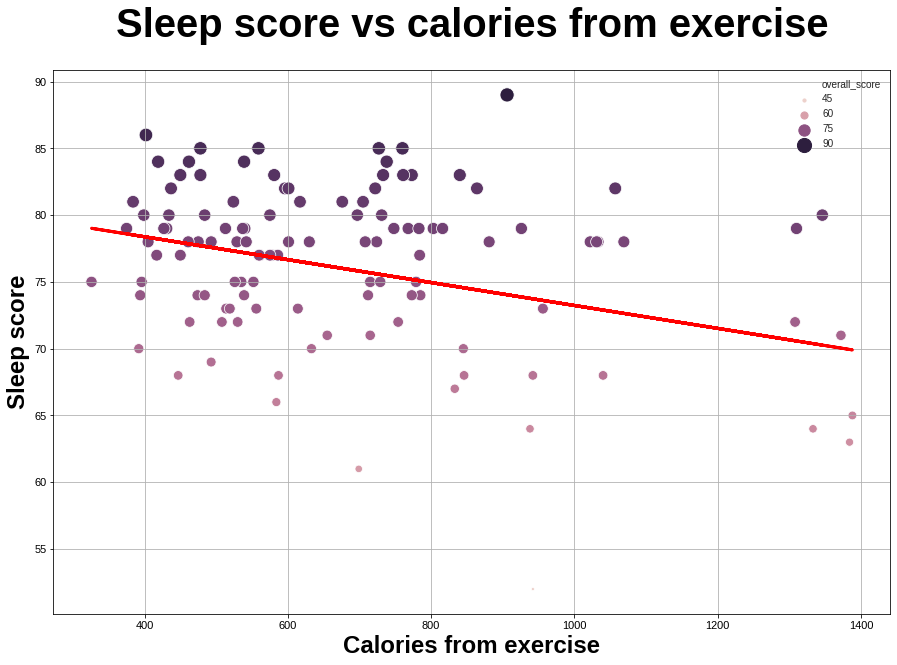

In [59]:
'''plotting a linear regression model of sleep score vs calories from exercise'''

#plt.scatter(X_test, y_test,  color='blue')

f, axes = plt.subplots( sharey=True, figsize=(15, 10))
comp_1 = sleepcise_data[sleepcise_data['Activity Calories']<2000]
title = axes.set_title('Sleep score vs calories from exercise', fontsize=40, fontweight='bold')
title.set_position([.5, 1.05])

plt.style.use('seaborn-dark')

sns.scatterplot(x='Activity Calories', y='overall_score', hue='overall_score', size='overall_score',  sizes=(10, 200),data=comp_1)
plt.plot(X_test_plot, pred_plot, color='red', linewidth=3);

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
xlabel = plt.xlabel("Calories from exercise", fontsize=24, fontweight='bold')
xlabel.set_position([.5, 55])
ylabel = plt.ylabel("Sleep score", fontsize=24, fontweight='bold')
plt.grid(True)
plt.show()




In [60]:
observed1 = pd.crosstab(sleepcise_data['Activity Calories'], sleepcise_data['overall_score'])
observed1

#crosstabs don't tell us anything unless we have categorical data

overall_score,52,61,63,64,65,66,67,68,69,70,71,72,73,74,75,77,78,79,80,81,82,83,84,85,86,89
Activity Calories,,,,,,,,,,,,,,,,,,,,,,,,,,
326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
384,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
392,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1346,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1372,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
pd.to_datetime(sleepcise_data['Date']) 


0     2019-12-06
1     2019-12-07
2     2019-12-08
3     2019-12-09
4     2019-12-11
         ...    
111   2020-04-22
112   2020-04-23
113   2020-04-24
115   2020-04-26
116   2020-04-27
Name: Date, Length: 116, dtype: datetime64[ns]

In [0]:
sleepcise_data['Date'] = pd.to_datetime(sleepcise_data['Date']) 


In [64]:
sleepcise_data

,Date,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,2019-12-06,2019-12-07 01:00:00,2019-12-07 09:30:00,426,84,32,510,61.0,327.0,38.0,1936,3724,1.66,7,851,100,7,19,474,74,15,22,37,22,46,0.074434
1,2019-12-07,2019-12-07 21:37:00,2019-12-08 08:41:00,516,148,30,664,91.0,419.0,6.0,2312,8838,3.94,19,716,141,29,44,938,64,16,14,34,38,46,0.097943
2,2019-12-08,2019-12-08 23:37:00,2019-12-09 09:03:00,501,64,36,565,100.0,373.0,28.0,2696,14345,7.98,18,477,227,9,63,1372,71,14,16,41,6,47,0.172060
3,2019-12-09,2019-12-09 23:58:00,2019-12-10 08:47:00,505,24,3,529,NaN,NaN,NaN,1854,1801,0.80,4,757,102,12,2,384,81,18,18,45,28,47,0.083112
4,2019-12-11,2019-12-11 23:36:00,2019-12-12 08:21:00,453,72,25,525,70.0,294.0,89.0,2158,6722,3.35,20,757,136,9,25,722,82,17,23,42,79,47,0.057085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2020-04-22,2020-04-23 00:13:00,2020-04-23 08:04:00,381,90,30,471,44.0,282.0,55.0,1909,3419,1.54,12,871,84,9,21,447,68,14,21,33,22,52,0.106828
112,2020-04-23,2020-04-24 00:31:00,2020-04-24 08:29:00,402,76,33,478,60.0,263.0,79.0,2263,7297,4.82,5,786,149,2,32,833,67,16,20,31,54,50,0.093275
113,2020-04-24,2020-04-25 01:22:00,2020-04-25 09:14:00,377,94,36,471,35.0,275.0,67.0,2149,6836,4.48,7,794,134,2,32,712,74,17,21,36,79,50,0.088267
115,2020-04-26,2020-04-26 23:30:00,2020-04-27 08:49:00,479,80,46,559,46.0,352.0,81.0,2394,6226,2.77,15,797,219,3,26,942,52,15,10,27,28,53,0.128370


In [65]:
'''checking that dates ares still in datetime format and other variables are numeric'''

sleepcise_data.dtypes

Date                      datetime64[ns]
Start Time                datetime64[ns]
End Time                  datetime64[ns]
Minutes Asleep                     int64
Minutes Awake                      int64
Number of Awakenings               int64
Time in Bed                        int64
Minutes REM Sleep                float64
Minutes Light Sleep              float64
Minutes Deep Sleep               float64
Calories Burned                    int64
Steps                              int64
Distance                         float64
Floors                             int64
Minutes Sedentary                  int64
Minutes Lightly Active             int64
Minutes Fairly Active              int64
Minutes Very Active                int64
Activity Calories                  int64
overall_score                      int64
composition_score                  int64
revitalization_score               int64
duration_score                     int64
deep_sleep_in_minutes              int64
resting_heart_ra

In [66]:
'''copying data for future tests'''

processed_data = sleepcise_data.copy()
print(processed_data.shape)
processed_data.head()

(116, 26)


,Date,Start Time,End Time,Minutes Asleep,Minutes Awake,Number of Awakenings,Time in Bed,Minutes REM Sleep,Minutes Light Sleep,Minutes Deep Sleep,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,2019-12-06,2019-12-07 01:00:00,2019-12-07 09:30:00,426,84,32,510,61.0,327.0,38.0,1936,3724,1.66,7,851,100,7,19,474,74,15,22,37,22,46,0.074434
1,2019-12-07,2019-12-07 21:37:00,2019-12-08 08:41:00,516,148,30,664,91.0,419.0,6.0,2312,8838,3.94,19,716,141,29,44,938,64,16,14,34,38,46,0.097943
2,2019-12-08,2019-12-08 23:37:00,2019-12-09 09:03:00,501,64,36,565,100.0,373.0,28.0,2696,14345,7.98,18,477,227,9,63,1372,71,14,16,41,6,47,0.172060
3,2019-12-09,2019-12-09 23:58:00,2019-12-10 08:47:00,505,24,3,529,NaN,NaN,NaN,1854,1801,0.80,4,757,102,12,2,384,81,18,18,45,28,47,0.083112
4,2019-12-11,2019-12-11 23:36:00,2019-12-12 08:21:00,453,72,25,525,70.0,294.0,89.0,2158,6722,3.35,20,757,136,9,25,722,82,17,23,42,79,47,0.057085


In [67]:
processed_data.dtypes

Date                      datetime64[ns]
Start Time                datetime64[ns]
End Time                  datetime64[ns]
Minutes Asleep                     int64
Minutes Awake                      int64
Number of Awakenings               int64
Time in Bed                        int64
Minutes REM Sleep                float64
Minutes Light Sleep              float64
Minutes Deep Sleep               float64
Calories Burned                    int64
Steps                              int64
Distance                         float64
Floors                             int64
Minutes Sedentary                  int64
Minutes Lightly Active             int64
Minutes Fairly Active              int64
Minutes Very Active                int64
Activity Calories                  int64
overall_score                      int64
composition_score                  int64
revitalization_score               int64
duration_score                     int64
deep_sleep_in_minutes              int64
resting_heart_ra

In [68]:
'''attempt at PCA'''
#from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#sleepcise_data = scaler.fit_transform(sleepcise_data)
#sleepcise_data

TypeError: ignored

In [78]:
'''attempt at heatmap'''

import plotly.graph_objects as go
import datetime
import numpy as np

sleep_score  = sleepcise_data['overall_score']

base = datetime.datetime.today()
dates = base - np.arange(160) * datetime.timedelta(days=1)
z = np.random.poisson(size=(len(sleep_score), len(dates)))

fig = go.Figure(data=go.Heatmap(
        z=z,
        x=dates,
        y=sleep_score,
        colorscale='Viridis'))

fig.update_layout(
    title='Sleep score over time',
    xaxis_nticks=36)

fig.show()

In [70]:
'''second attempt at heatmap'''

sns.heatmap(sleepcise_data['overall_score'], sleepcise_data['resting_heart_rate'], annot=True)

IndexError: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:203: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:208: RuntimeWarning:

All-NaN slice encountered



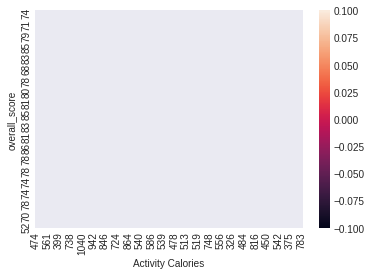

In [71]:
'''third attempt at heatmap'''

import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index = sleepcise_data['overall_score']
Cols = sleepcise_data['Activity Calories']
df = DataFrame(sleepcise_data, index=Index, columns=Cols)

sns.heatmap(df, annot=True)